In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

##data downloaded from csv file which downloaded and saved from github

Predicting HR Attrition (Yes / No) , The output is Binary here so will first review the data , columns and perform EDA

checking the column names

In [3]:
df.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


checking the null values using heatmap, so to check this in values we will use below command

<AxesSubplot:>

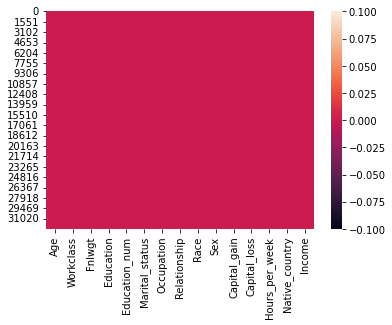

In [5]:
sns.heatmap(df.isnull())
#Below shows the data does not have NULL Values

# checking the count of null values

In [6]:
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# we will require encoding to convert oject into float

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

In [8]:
df.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Now checking the null value status

<AxesSubplot:>

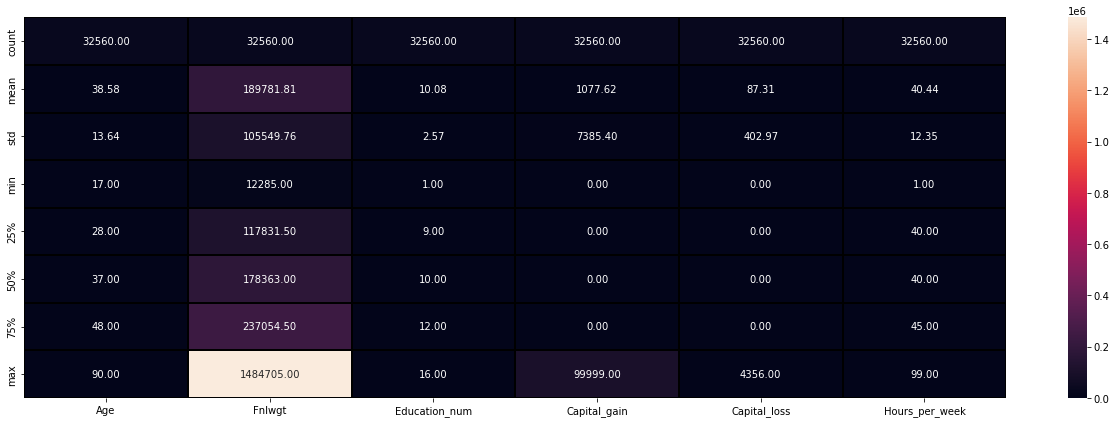

In [9]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [10]:
df.shape
#data has 15 columns and 32560 rows

(32560, 15)

Above we can see the difference between std dev and mean shows data has outliers which we will remove later however we will first convert object datatypes to string using ordinal encoder


In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [12]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [13]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income            float64
dtype: object

all datatypes are int or float , hence good to proceed

In [14]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


In [ ]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [15]:
dfcorr["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64


The columns with very low correlation , we will drop which are below
'Education','Occupation','Race',Workclass','Native_country','Fnlwgt'




In [16]:
df1=df.drop(['Education','Occupation','Race','Workclass','Native_country','Fnlwgt'],axis=1)
df1

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,13,2.0,0.0,1.0,0,0,13,0.0
1,38,9,0.0,1.0,1.0,0,0,40,0.0
2,53,7,2.0,0.0,1.0,0,0,40,0.0
3,28,13,2.0,5.0,0.0,0,0,40,0.0
4,37,14,2.0,5.0,0.0,0,0,40,0.0
...,...,...,...,...,...,...,...,...,...
32555,27,12,2.0,5.0,0.0,0,0,38,0.0
32556,40,9,2.0,0.0,1.0,0,0,40,1.0
32557,58,9,6.0,4.0,0.0,0,0,40,0.0
32558,22,9,4.0,3.0,1.0,0,0,20,0.0


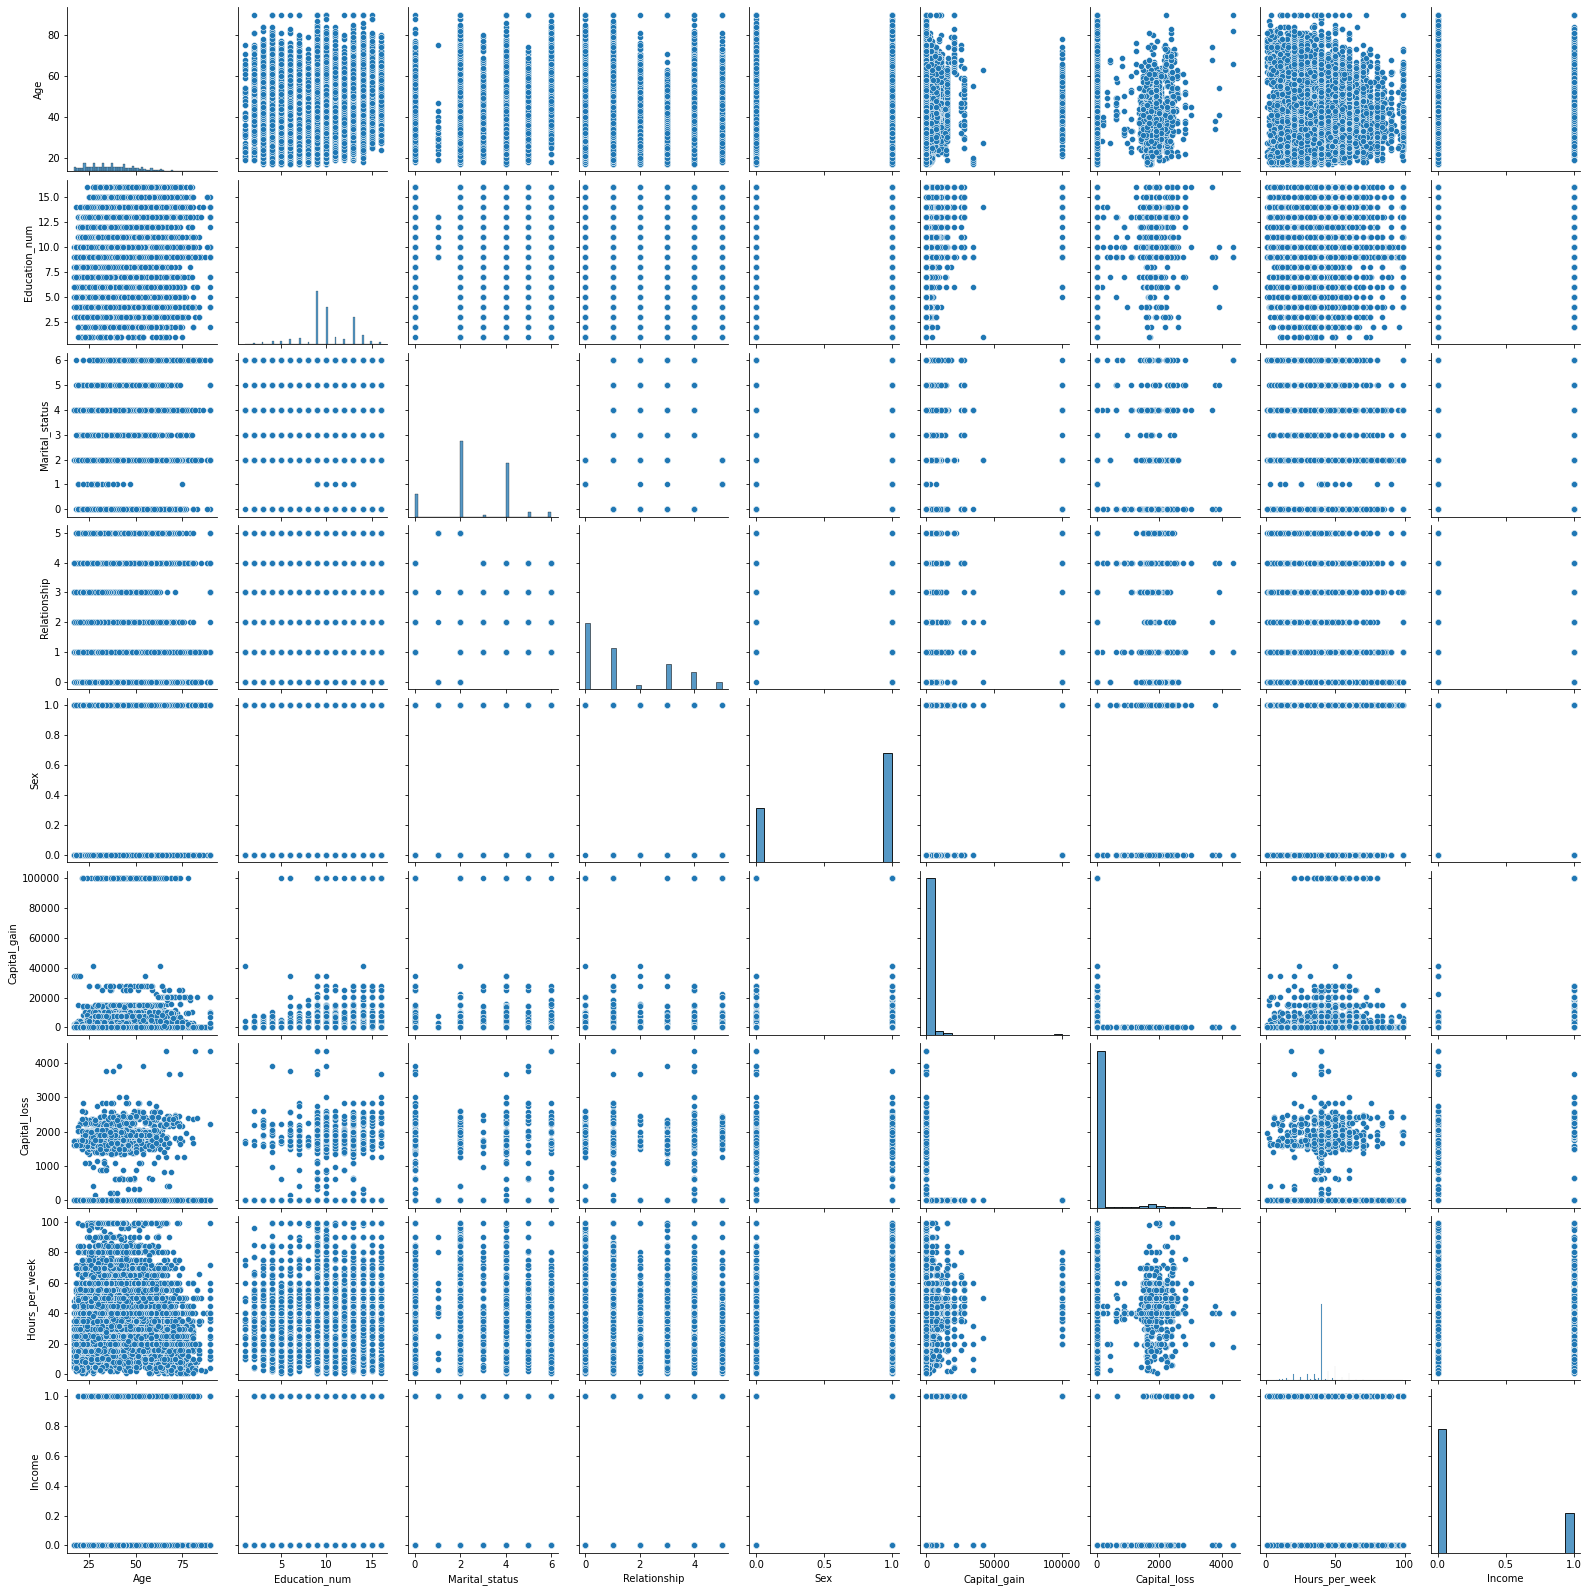

In [17]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

In [18]:
df1.columns

Index(['Age', 'Education_num', 'Marital_status', 'Relationship', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

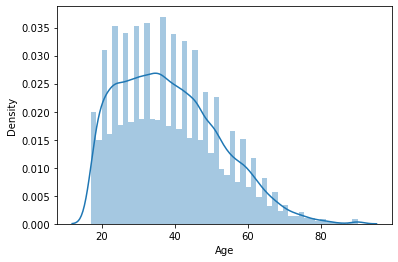

In [20]:
#we will check the data distribution using distplots
sns.distplot(df1['Age'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

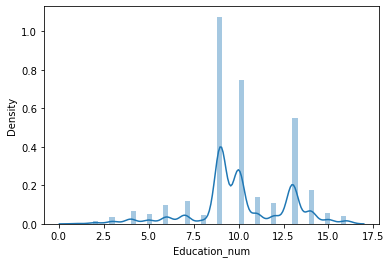

In [21]:
sns.distplot(df1['Education_num'])

<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

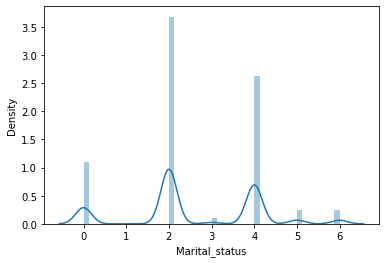

In [22]:
sns.distplot(df1['Marital_status'])

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

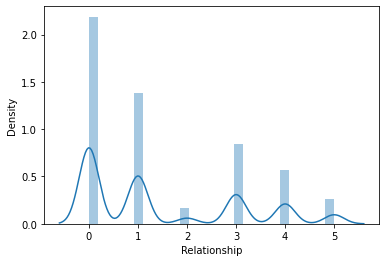

In [23]:
sns.distplot(df1['Relationship'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

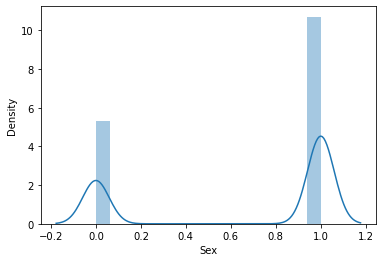

In [24]:
sns.distplot(df1['Sex'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

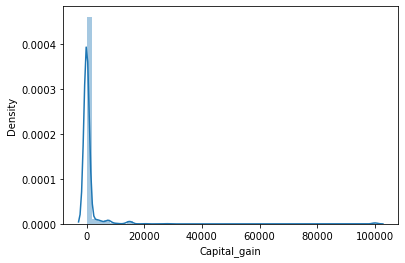

In [25]:
sns.distplot(df1['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

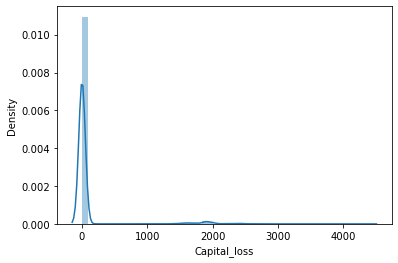

In [26]:
sns.distplot(df1['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

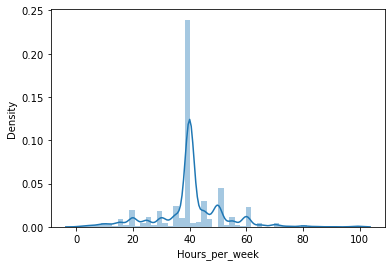

In [27]:
sns.distplot(df1['Hours_per_week'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

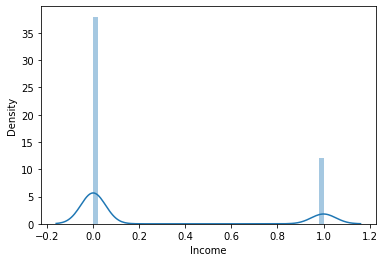

In [28]:
sns.distplot(df1['Income'])

Age                  AxesSubplot(0.125,0.657941;0.110714x0.222059)
Education_num     AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Marital_status    AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Relationship      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Sex               AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Capital_gain      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Capital_loss         AxesSubplot(0.125,0.391471;0.110714x0.222059)
Hours_per_week    AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Income            AxesSubplot(0.390714,0.391471;0.110714x0.222059)
dtype: object

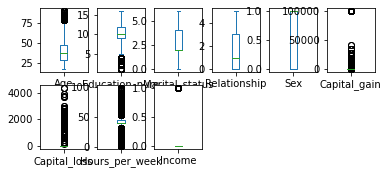

In [19]:

df1.plot(kind='box',subplots=True,layout=(3,6))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

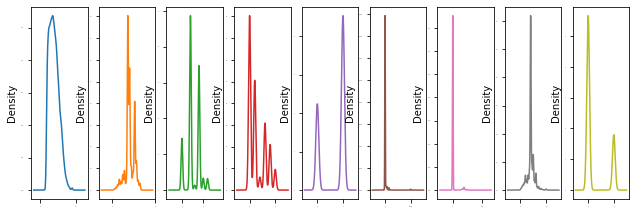

In [29]:
df1.plot(kind='density',subplots=True,layout=(3,15),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Above density charts and distributions charts clearly indicates skewness in data

As we have outliers in the data so we need to remove outliers first

In [30]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,0.837097,1.134779,0.406183,0.900177,0.703087,0.145914,0.216663,2.222120,0.563210
1,0.042640,0.420027,1.734026,0.277810,0.703087,0.145914,0.216663,0.035430,0.563210
2,1.057031,1.197429,0.406183,0.900177,0.703087,0.145914,0.216663,0.035430,0.563210
3,0.775755,1.134779,0.406183,2.211658,1.422298,0.145914,0.216663,0.035430,0.563210
4,0.115952,1.523480,0.406183,2.211658,1.422298,0.145914,0.216663,0.035430,0.563210
...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.746077,0.406183,2.211658,1.422298,0.145914,0.216663,0.197407,0.563210
32556,0.103982,0.420027,0.406183,0.900177,0.703087,0.145914,0.216663,0.035430,1.775537
32557,1.423589,0.420027,2.249503,1.589291,1.422298,0.145914,0.216663,0.035430,0.563210
32558,1.215624,0.420027,0.921660,0.966924,0.703087,0.145914,0.216663,1.655200,0.563210


In [31]:
z=np.abs(zscore(df1))

In [32]:
z.shape

(32560, 9)

In [33]:
threshold=3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([7, 6, 7, ..., 0, 7, 7], dtype=int64))


In [34]:
len(np.where(z>3)[0])

2465

In [35]:
df2=df1[(z<3).all(axis=1)]

In [36]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (32560, 9)
new dataframe (30150, 9)
total dropped 2410


In [37]:
loss_percent=(32560-30150)/32560*100
print(loss_percent,"%")
#here by removing the outliers loosign 7.4% of data which is fine as it will help in gettign better model accuracy

7.401719901719901 %


In [38]:
#we will now check skewness in data
df2.skew()

Age                0.494157
Education_num     -0.171984
Marital_status    -0.050738
Relationship       0.742629
Sex               -0.681022
Capital_gain       4.940872
Capital_loss      29.821934
Hours_per_week    -0.354877
Income             1.330384
dtype: float64

In [39]:
# We will break data into input and output and then remove skewness
x=df2.drop("Income",axis=1)
y=df2["Income"]

In [40]:
x

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,13,2.0,0.0,1.0,0,0,13
1,38,9,0.0,1.0,1.0,0,0,40
2,53,7,2.0,0.0,1.0,0,0,40
3,28,13,2.0,5.0,0.0,0,0,40
4,37,14,2.0,5.0,0.0,0,0,40
...,...,...,...,...,...,...,...,...
32555,27,12,2.0,5.0,0.0,0,0,38
32556,40,9,2.0,0.0,1.0,0,0,40
32557,58,9,6.0,4.0,0.0,0,0,40
32558,22,9,4.0,3.0,1.0,0,0,20


In [41]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 30150, dtype: float64

In [42]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)


,Variables,VIF Factor
0,Age,7.709236
1,Education_num,13.637785
2,Marital_status,3.715283
3,Relationship,2.396294
4,Sex,4.009175
5,Capital_gain,1.095603
6,Capital_loss,1.003420
7,Hours_per_week,12.362148


Capital_loss will be dropped to avoid multicollinierarity

In [43]:
x1=x.drop(["Capital_loss"],axis=1)
x1

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Hours_per_week
0,50,13,2.0,0.0,1.0,0,13
1,38,9,0.0,1.0,1.0,0,40
2,53,7,2.0,0.0,1.0,0,40
3,28,13,2.0,5.0,0.0,0,40
4,37,14,2.0,5.0,0.0,0,40
...,...,...,...,...,...,...,...
32555,27,12,2.0,5.0,0.0,0,38
32556,40,9,2.0,0.0,1.0,0,40
32557,58,9,6.0,4.0,0.0,0,40
32558,22,9,4.0,3.0,1.0,0,20


In [44]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [45]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0   -0.016716
1    0.022754
2   -0.127418
3    0.104123
4   -0.681022
5    3.074180
6    0.108212
dtype: float64

As this is Binary classification problem and we can see imbalance data so will use Smote technique to balance the data

In [54]:
#using scaling technique for scaling of independent data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x2=st.fit_transform(x2)
x2

array([[ 0.9316188 ,  1.21101851, -0.3928786 , ...,  0.71588492,
        -0.29667421, -2.21854598],
       [ 0.13349447, -0.46367441, -1.76817479, ...,  0.71588492,
        -0.29667421, -0.03632139],
       [ 1.10645925, -1.24732296, -0.3928786 , ...,  0.71588492,
        -0.29667421, -0.03632139],
       ...,
       [ 1.38073209, -0.46367441,  2.16904623, ..., -1.39687256,
        -0.29667421, -0.03632139],
       [-1.33449245, -0.46367441,  0.90813265, ...,  0.71588492,
        -0.29667421, -1.7229872 ],
       [ 1.0490941 , -0.46367441, -0.3928786 , ..., -1.39687256,
         3.37073637, -0.03632139]])

Now we have our input and output ready to be tested for model , this is a classification problem so will go with Multinomial Naive Bayes first

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x2_train,y_train)
    predlr=lr.predict(x2_test)
    acc=accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is",maxAccu,"on Random State",maxRS)
    

accuracy 0.8281923714759536 random_state 1
accuracy 0.8260364842454395 random_state 2
accuracy 0.833665008291874 random_state 3
accuracy 0.8237147595356551 random_state 4
accuracy 0.8316749585406302 random_state 5
accuracy 0.8280265339966832 random_state 6
accuracy 0.8222222222222222 random_state 7
accuracy 0.8393034825870647 random_state 8
accuracy 0.8271973466003317 random_state 9
accuracy 0.8334991708126036 random_state 10
accuracy 0.8323383084577114 random_state 11
accuracy 0.8325041459369817 random_state 12
accuracy 0.8348258706467662 random_state 13
accuracy 0.8250414593698175 random_state 14
accuracy 0.8371475953565506 random_state 15
accuracy 0.8286898839137645 random_state 16
accuracy 0.8266998341625207 random_state 17
accuracy 0.8260364842454395 random_state 18
accuracy 0.8240464344941957 random_state 19
accuracy 0.8338308457711443 random_state 20
accuracy 0.82106135986733 random_state 21
accuracy 0.8262023217247098 random_state 22
accuracy 0.8298507462686567 random_state 23


accuracy 0.8318407960199005 random_state 191
accuracy 0.8286898839137645 random_state 192
accuracy 0.8320066334991708 random_state 193
accuracy 0.8266998341625207 random_state 194
accuracy 0.8265339966832504 random_state 195
accuracy 0.8240464344941957 random_state 196
accuracy 0.8286898839137645 random_state 197
accuracy 0.826865671641791 random_state 198
accuracy 0.8227197346600331 random_state 199
Best Accuracy is 0.84212271973466 on Random State 80


In [56]:
#Applying the above parameters to Logistic Regression 
lr=LogisticRegression()
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=80)
lr.fit(x2_train,y_train)
predlr=lr.predict(x2_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
cvscore=cross_val_score(lr,x2,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.84212271973466
[[4499  257]
 [ 695  579]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90      4756
         1.0       0.69      0.45      0.55      1274

    accuracy                           0.84      6030
   macro avg       0.78      0.70      0.73      6030
weighted avg       0.83      0.84      0.83      6030

cross val score: 0.8296185737976781


In [57]:
#Lets try with RandomForest Classifier model
rfs=RandomForestClassifier(n_estimators=100,random_state=80)
rfs.fit(x2_train,y_train)
predrfs=rfs.predict(x2_test)
print(accuracy_score(y_test,predrfs))
print(confusion_matrix(y_test,predrfs))
print(classification_report(y_test,predrfs))
cvscore1=cross_val_score(rfs,x2,y,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.8416252072968491
[[4360  396]
 [ 559  715]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      4756
         1.0       0.64      0.56      0.60      1274

    accuracy                           0.84      6030
   macro avg       0.76      0.74      0.75      6030
weighted avg       0.84      0.84      0.84      6030

cross val score: 0.839436152570481


In [58]:
#using Kneighbors Classifier to check results
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train,y_train)
knn.score(x2_train,y_train)
predknn=knn.predict(x2_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
cvscore2=cross_val_score(knn,x2,y,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.8250414593698175
[[4291  465]
 [ 590  684]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      4756
         1.0       0.60      0.54      0.56      1274

    accuracy                           0.83      6030
   macro avg       0.74      0.72      0.73      6030
weighted avg       0.82      0.83      0.82      6030

cross val score: 0.8262686567164179


In [60]:
#using support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x2_train,y_train)
svc.score(x2_train,y_train)
predsvc=svc.predict(x2_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
cvscore3=cross_val_score(svc,x2,y,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.8487562189054726
[[4480  276]
 [ 636  638]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      4756
         1.0       0.70      0.50      0.58      1274

    accuracy                           0.85      6030
   macro avg       0.79      0.72      0.75      6030
weighted avg       0.84      0.85      0.84      6030

cross val score: 0.8408291873963517


In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x2_train,y_train)
dtc.score(x2_train,y_train)
preddtc=dtc.predict(x2_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
cvscore4=cross_val_score(dtc,x2,y,cv=5)
cvm4=cvscore4.mean()
print("cross val score:",cvm4)

0.8202321724709785
[[4281  475]
 [ 609  665]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      4756
         1.0       0.58      0.52      0.55      1274

    accuracy                           0.82      6030
   macro avg       0.73      0.71      0.72      6030
weighted avg       0.81      0.82      0.82      6030

cross val score: 0.8253731343283583


In [62]:
#Trying to boost the learning of decision tree classifier, estimators by default is 50

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x2_train,y_train)
ad_pred=ad.predict(x2_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))
cvscore5=cross_val_score(ad,x2,y,cv=5)
cvm5=cvscore5.mean()
print("cross val score:",cvm5)

0.8655058043117745
[[4518  238]
 [ 573  701]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4756
         1.0       0.75      0.55      0.63      1274

    accuracy                           0.87      6030
   macro avg       0.82      0.75      0.78      6030
weighted avg       0.86      0.87      0.86      6030

cross val score: 0.8553897180762853


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x2_train,y_train)
gb_pred=gb.predict(x2_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
cvscore6=cross_val_score(gb,x2,y,cv=5)
cvm6=cvscore6.mean()
print("cross val score:",cvm6)

0.8681592039800995
[[4533  223]
 [ 572  702]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4756
         1.0       0.76      0.55      0.64      1274

    accuracy                           0.87      6030
   macro avg       0.82      0.75      0.78      6030
weighted avg       0.86      0.87      0.86      6030

cross val score: 0.8586733001658373


Hypertuning below for the algorithm selected as Random Forest Classifier

In [64]:
RandomForestClassifier()

RandomForestClassifier()

In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini','entropy']}

In [66]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x2_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'auto'}

In [67]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [68]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy')

In [69]:
GCV_pred=GCV.best_estimator_.predict(x2_test)
accuracy_score(y_test,GCV_pred)
print(accuracy_score(y_test,GCV_pred))
print(confusion_matrix(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))
cvscore7=cross_val_score(GCV.best_estimator_,x2,y,cv=5)
cvm7=cvscore7.mean()
print("cross val score:",cvm7)

0.8389718076285241
[[4351  405]
 [ 566  708]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      4756
         1.0       0.64      0.56      0.59      1274

    accuracy                           0.84      6030
   macro avg       0.76      0.74      0.75      6030
weighted avg       0.83      0.84      0.83      6030

cross val score: 0.8393034825870647


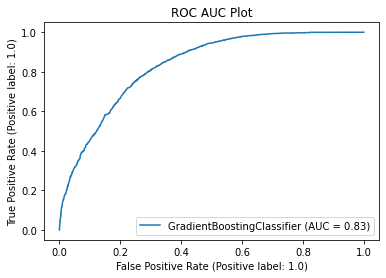

In [70]:
#Lets plot AUC ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gb,x3_test,y1_test)
plt.title("ROC AUC Plot")
plt.show()

-------------------------------------------------------------------------------------------------
Logistic Regression 84% accuracy score ,84 % accuracy in F1 score and 82 % Cross Val score 

RandomForestClassifier 84% accuracy score ,84 % accuracy in F1 score and 83 % Cross Val score 

KNeighborsClassifier 82 % accuracy , 83 % accuracy in F1 score and 82 % Cross Val score 

support vector classifier using kernel as poly 84 % accuracy , 85 % accuracy in F1 score and 84 % Cross Val score 

DecisionTreeClassifier 86% accuracy , 86 % accuracy in F1 score and 85 % Cross Val score 

AdaBoostClassifier 86 % accuracy , 87 % accuracy in F1 score and 85 % Cross Val score 

GradientBoostingClassifier 86 % accuracy , 87 % accuracy in F1 score and 85 % Cross Val score 

By doing Hypertuning using RandomForestClassifier with best param 83 % accuracy , 84 % accuracy in F1 score and 83 % Cross Val score

We select GradientBoostingClassifier which has 86% accuracy with 87% F1 Score and 85% cross val score as final model

The AUC ROC plot above provides 83% score which is a very good score so will use the model

---------------------------------------------------------------------------------------------------

In [72]:
#we will save this model
import pickle

In [73]:
filename='income.pkl'
pickle.dump(gb,open(filename,'wb'))

In [74]:
#Conclusion 
loaded_model=pickle.load(open('income.pkl','rb'))
result=loaded_model.score(x2_test,y_test)
print(result)
                        

0.8681592039800995


In [75]:
#conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:],pred_decision[:]],index=["Predicted","Original"])
#predicting the sales using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x2_test)[:],gb_pred[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Original,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Above we are testing the agreed model and results 